# Analyse Exploratoire des Crédits Alloués

Ce Notebook contient une analyse exploratoire des données après la phase de Segmentation (`cash_allocated_data`).

Nous allons examiner les caractéristiques principales des données, visualiser les répartitions et identifier les tendances pertinentes.

In [10]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Charger les données de crédits alloués
cash_allocated_data_path = "../data/processed/cash_allocated_data.csv"
cash_allocated_data = pd.read_csv(cash_allocated_data_path)

# Aperçu des données
cash_allocated_data.head()

,DATE_OF_THE_DAY,SIM_NUMBER,HAS_USED_MOB_MONEY_IN_LAST_30_DAYS,HAS_USED_MOB_MONEY_IN_LAST_7_DAYS,HAS_USED_MOB_MONEY_IN_LAST_90_DAYS,PAID_DATA_VOLUME,PAID_VOICE_TRAFFIC,HAS_USED_MOB_MONEY_IN_LAST_1_DAY,VOICE_REVENUE,DATA_REVENUE,...,Voice_Service_Score,SMS_Service_Score,Digital_Service_Score,Profile_Code,Weighted_Score,Segment,Nano_Loan,Advanced_Credit,Macro_Loan,Cash_Roller_Over
0,20230918,C1850294050,1,1,1,1551.85,1311.07,1,486.81,115.21,...,3,4,4,22344,39,Very Low,30.000000,260.000000,NaN,NaN
1,20231029,C2042071881,0,1,1,4759.05,267.29,1,77.07,110.88,...,3,4,1,34341,49,High,34.166667,326.666667,NaN,NaN
2,20231102,C1001545517,0,1,1,4813.52,24.33,0,83.86,7.84,...,3,3,2,43332,49,High,34.166667,326.666667,NaN,NaN
3,20231126,C1204243390,0,1,1,734.09,1018.34,0,284.10,18.31,...,3,3,3,32333,41,Very Low,30.833333,273.333333,NaN,NaN
4,20230801,C913434705,1,1,1,2166.61,255.10,1,464.50,120.56,...,3,3,3,33333,45,Medium,NaN,NaN,137.5,300.0


In [23]:
# Afficher les informations générales
cash_allocated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351748 entries, 0 to 351747
Columns: 115 entries, DATE_OF_THE_DAY to Cash_Roller_Over
dtypes: float64(37), int64(56), object(22)
memory usage: 308.6+ MB


In [24]:
# Statistiques descriptives
credit_columns = ['Nano_Loan', 'Advanced_Credit', 'Macro_Loan', 'Cash_Roller_Over']
print("Statistiques descriptives des crédits alloués :")
cash_allocated_data[credit_columns].describe()

Statistiques descriptives des crédits alloués :


,Nano_Loan,Advanced_Credit,Macro_Loan,Cash_Roller_Over
count,175470.000000,175470.000000,176278.000000,176278.000000
mean,33.042303,308.676849,142.272646,308.484704
std,1.693934,27.102945,15.268279,27.143607
min,25.833333,193.333333,81.250000,200.000000
25%,32.083333,293.333333,130.000000,286.666667
50%,32.916667,306.666667,141.250000,306.666667
75%,34.166667,326.666667,152.500000,326.666667
max,41.250000,440.000000,208.750000,426.666667


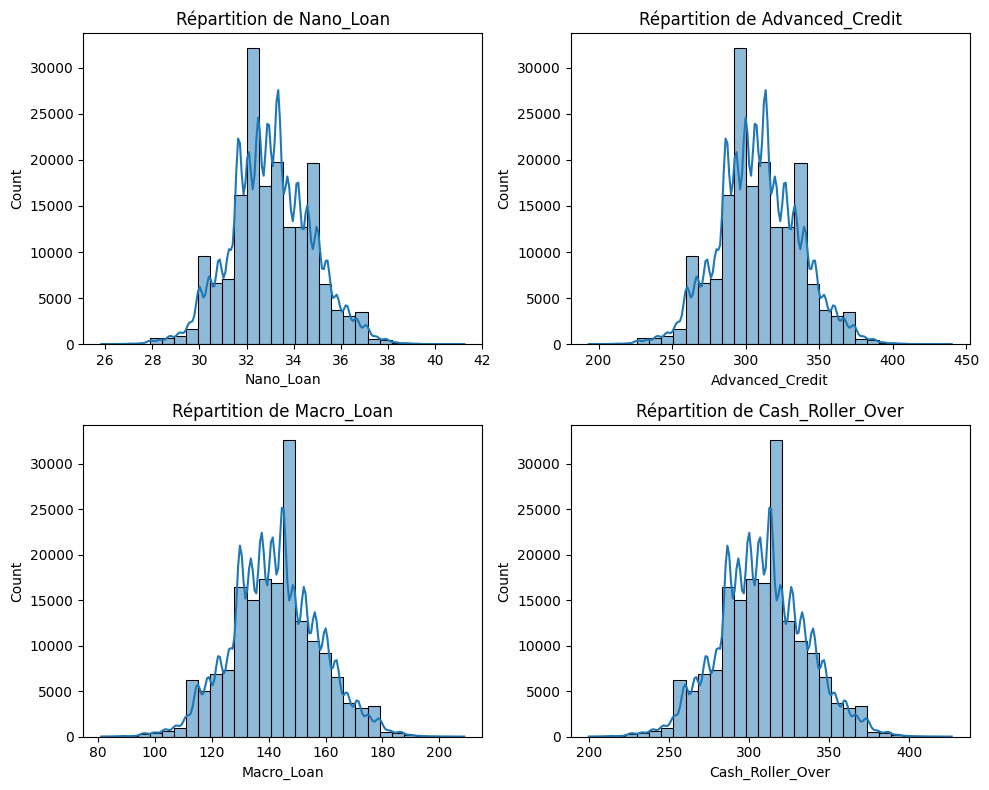

In [25]:
# Visualisation : Histogrammes des crédits
plt.figure(figsize=(10, 8))
for i, col in enumerate(credit_columns, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(cash_allocated_data[col], kde=True, bins=30)
    plt.title(f"Répartition de {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()
